In [1]:
#必要なライブラリをインストール
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
#1次元の離散型確率変数の定義
#確率質量関数(PMF)
#イカサマサイコロを例に確認
x_set = np.array([1,2,3,4,5,6])

In [3]:
#イカサマサイコロの取り得る値を入れた時に、その確率を返す確率関数を実装
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
#取りうる値の集合と確率関数のセットが確率関数で、これによって確率変数X振る舞いが決まる
#そのためXはx_setとfを要素に持つリストとして実装する
X = [x_set, f]

In [5]:
#これで確率変数Xが定義できた。
#確率関数から各xkの確率pkを求めてみる。
#ここではxkと確率pkの対応を辞書型にして表示してみる。

#確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set])
#x_kとｐ＿ｋの対応を辞書型にして表示
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12427 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20516 missing from current fon

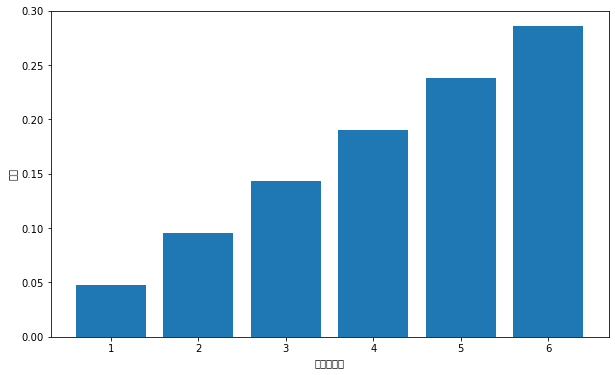

In [6]:
#取り得る値と確率の対応を棒グラフにしてみる。
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('取り得る値')
ax.set_ylabel('確率')

plt.show()

In [7]:
#確率の性質
#確率は絶対に0以上で、すべての確率の和は1にならなければならない
#確率がすべて0以上であるかはnp.all関数(bool判定)を使うことで確認できる
np.all(prob >= 0)

True

In [8]:
#確率の総和が1になっていることも確認
np.sum(prob)

0.9999999999999999

In [9]:
#累積分布関数
#確率関数は確率変数Xがxになるときの確率を返す関数
#確率変数Xがx以下になるときの確率を返す関数F(x)を累積分布関数(CDF:分布関数)という
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
#分布関数を使うことで、例えば出目が3以下になる確率
F(3)

0.2857142857142857

In [10]:
#確率関数の変換
#確率関数の変換とは、例えば確率変数Xに2を掛けて3を足した2X+3といったものである。
#確率変数を標準化する(平均を引いて標準偏差で割る)ときなどに重要となる操作である。
#変換を行った確率変数もまた確率変数である。

#2X+3を確率変数Yとして、確率分布を求める。
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [11]:
#1次元の離散型確率変数の指標
#期待値
#確率変数の平均：確率変数の平均とは確率変数を何回も(無限回)試行して得られた実現値の平均のことである。
#無限回の試行を現実に行うことができないので、離散型確率変数の場合には、確率変数の平均は、確率変数の取り得る値とその確率の積の総和として定義される。
#期待値：確率変数の平均をいう

#イカサマサイコロの期待値を定義通り計算
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [12]:
#確率変数の期待値は無限回試行したときの実現値の平均である。ここでは無限回の試行を100万(=10^6)回サイコロを振ってみる
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332193

In [13]:
#変換した確率変数の期待値を考える
#この場合、期待値はxkの部分を2ｘｋ＋3に置き換えた式で定義される。=> P87:右下
#これを期待値の関数として実装しておく。

#引数gが確率変数に対する変換の関数になっている。
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [14]:
#gに何も指定しなければ確率変数Xの期待値を求めることになる
E(X)

4.333333333333333

In [15]:
#確率変数Y=2X+3の期待値は次のように計算できる
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [16]:
#期待値の線形性の性質を用いて、確率変数Xを変換した確率変数aX+bの期待値を、Xの期待値で求めることができる。
#期待値の線形性：E(aX+b)=aE(X)+b  (a,bは実数　X：確率変数)

#E(2X+3)が2E(X)+3と等しいかを確認
2 * E(X) + 3

11.666666666666666

In [17]:
#確率変数の分散
#離散型確率変数の場合、分散は偏差の二乗の期待値として定義される

#イカサマサイコロの分散
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [18]:
#変換した確率変数について分散を定義
#確率変数：Y=2X+3 引数gを確率変数に対する変換の関数とする。
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [19]:
#gを指定しなければ、確率変数Xの分散を計算する
V(X)

2.2222222222222223

In [20]:
#確率変数Y=2X+3の分散は次のように計算される
V(X, lambda x: 2*x + 3)

8.88888888888889

In [21]:
#期待値と同様に、分散でもV(2X+3)をV(X)を使って計算できる
#公式：V(aX+b) = a^2V(X)
#この公式により、V(2X+3) = 2^2V(X)
2**2 * V(X)

8.88888888888889

In [22]:
#2次元の離散型確率変数
#同時確率分布
#2次元の確率変数では、1次元の確率変数を2つ同時に扱い(X, Y)と表記する。
# その振る舞いは、取り得る値の組み合わせの集合とその確率によって定まる。
#同時確率分布
#確率変数(X, Y)の振る舞いを同時に考えた分布のことを同時確率分布(同時分布)という。

#イカサマサイコロAの出目をY、サイコロAの出目とサイコロBの出目の和をXとした2次元の確率分布を考えてみる。
#このときXとYそれぞれの取り得る集合の値
# Y {1,2,3,4,5,6}  X {2,3,4,5,6,7,8,9,10,11,12} 

#2次元確率分布の確率はxとｙを引数に取る関数とみることができる。
#そのようなP(X=x, Y=y) = fxy(x,y)となる関数fxy(x,y)を同時確率関数という。

#XとYの取り得る値の集合をそれぞれx_setとy_setとして定義する。
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [23]:
#次に動じ確率変数を定義する。
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x - y) / 441
    else:
        return 0

In [24]:
#確率変数(X,Y)の振る舞いはx_setとy_setとf_xyによって定義されるので、これらをリストにしてXYとする。
XY = [x_set, y_set, f_XY]

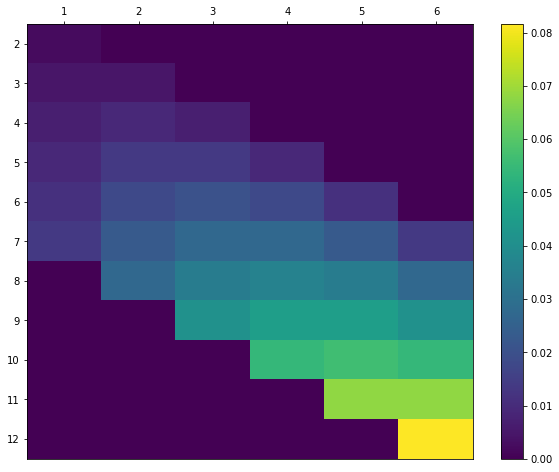

In [26]:
#確率分布をヒートマップを使って図示する
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
#ｙ軸を下が大きい数字になるように、上下逆転させる
ax.invert_yaxis()
#x軸の目盛りをグラフ上側に表示
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [27]:
#確率が必ず0以上になっているかどうかの確認
np.all(prob >= 0)

True

In [28]:
#確率の総和が1かどうかを確認
np.sum(prob)

1.0

In [32]:
#周辺確率分布(周辺分布)
#確率変数(X,Y)が同時確率関数によって定義されているとき、確率変数Xのみの振る舞い
#つまり、確率関数Xの確率関数を知りたい状況のとき
#このときの確率変数Xの確率関数fX(x)は、同時確率関数ｆXYにYの取り得る値をすべて代入して足し合わせて得られる関数によって求めることができる
#これは同時確率関数fXYから確率変数Yの影響を取り除くと、確率変数Xの振る舞いを記述する確率変数Xの確率関数のみが残ると考える。
#このようにして求められたfX(x)のことをXの周辺確率分布(Xの周辺分布)という。

#Xの周辺分布
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

#Yの周辺分布
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [33]:
#周辺分布が求まったところで、XとYをそれぞれ独立に考えることができる。
X = [x_set, f_X]
Y = [y_set, f_Y]

/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36794 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24067 missing from current fon

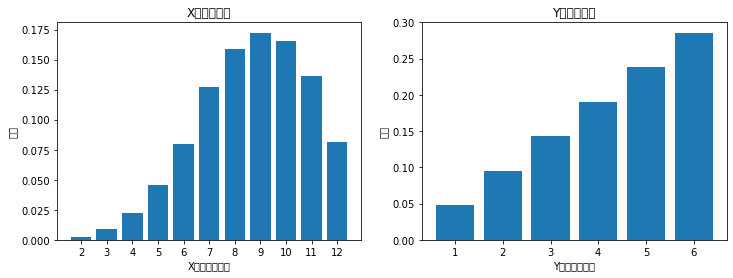

In [34]:
#X,Yそれぞれについて確率の分布がどのようになっているか図示してみる
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel('Xの取り得る値')
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel('Yの取り得る値')
ax2.set_ylabel('確率')

plt.show()